In [1]:
1+2


3

In [3]:
import uproot
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import h5py
import math

from util import *

import var
import cut
import data
import hist

import importlib

from pyanalib import panda_helpers
from jams_funcs import *

In [4]:
POTSTR = "2e20 POT"

dir = '/icarus/data/users/jdyer/muon_selection/dfs/all_nus_bg/with_kin/'
evtdf = pd.read_pickle(dir + 'final_df')
mc_res = pd.read_pickle(dir + 'res_mc')
pc_res = pd.read_pickle(dir + 'res_percent')
pot_res = pd.read_pickle(dir + 'res_pot')


In [7]:
pot_res

,"$M_S$ = 220, $\theta_S$ = 5e-05","$M_S$ = 240, $\theta_S$ = 5e-05","$M_S$ = 260, $\theta_S$ = 5e-05","$M_S$ = 300, $\theta_S$ = 3e-05","$M_S$ = 330, $\theta_S$ = 2e-05","$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = 1000000.0","$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = 1000000.0",$\nu$,Cosmic
preselection,3.03,30.03,54.11,4.67,1.68,3.60,5.23,7.92,15.10,16.87,0.06,0.03,18438.07,40260.16
below 0_5cm dqdx <= 500000.0,2.94,28.71,51.52,4.50,1.62,3.45,5.01,7.62,14.55,16.31,0.05,0.02,16350.50,37824.27
up to 1cm dqdx <= 240000.0,2.92,28.53,50.97,4.46,1.61,3.41,4.97,7.55,14.43,16.15,0.05,0.02,14790.87,35842.14
up to 2cm dqdx <= 200000.0,2.90,28.40,50.64,4.44,1.60,3.38,4.92,7.48,14.30,15.98,0.05,0.02,13041.03,34006.79
up to 3cmdqdx <= 160000.0,2.88,28.22,50.42,4.42,1.59,3.35,4.88,7.42,14.19,15.85,0.05,0.02,11980.96,33091.58
max shower len < 0 cm,2.44,23.84,43.54,3.82,1.38,2.84,4.18,6.34,12.11,13.28,0.05,0.02,6884.89,25942.89
both chi2mu < 18,2.21,22.90,41.07,3.63,1.31,2.67,3.91,5.89,11.19,12.01,0.04,0.02,4908.09,18281.26
both chi2p > 90,2.13,22.58,40.74,3.59,1.30,2.64,3.86,5.81,11.05,11.90,0.04,0.02,4633.76,17639.28
S_NuMI_angle < 0.05 rad,0.73,11.52,20.48,1.88,0.68,1.54,2.27,3.30,5.95,5.83,0.02,0.01,132.97,3.26
opening angle < 0.35 rad,0.71,11.03,17.89,1.60,0.49,1.35,1.84,2.56,4.62,5.25,0.01,0.00,10.85,0.04


In [7]:
categories = make_categories(evtdf)
for sample in categories:
    print(sample.name)

$M_S$ = 220, $\theta_S$ = 5e-05
$M_S$ = 240, $\theta_S$ = 5e-05
$M_S$ = 260, $\theta_S$ = 5e-05
$M_S$ = 300, $\theta_S$ = 3e-05
$M_S$ = 330, $\theta_S$ = 2e-05
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = 1000000.0
$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = 1000000.0
$\nu$
Cosmic


In [10]:
for c in evtdf.columns:
    print(c)

('slc', 'is_clear_cosmic', '', '', '', '')
('slc', 'vertex', 'x', '', '', '')
('slc', 'vertex', 'y', '', '', '')
('slc', 'vertex', 'z', '', '', '')
('slc', 'self', '', '', '', '')
('slc', 'tmatch', 'eff', '', '', '')
('slc', 'tmatch', 'pur', '', '', '')
('slc', 'tmatch', 'idx', '', '', '')
('slc', 'producer', '', '', '', '')
('slc', 'nuid', 'crlongtrkdiry', '', '', '')
('slc', 'truth', 'E', '', '', '')
('slc', 'truth', 'bjorkenX', '', '', '')
('slc', 'truth', 'inelasticityY', '', '', '')
('slc', 'truth', 'Q2', '', '', '')
('slc', 'truth', 'w', '', '', '')
('slc', 'truth', 't', '', '', '')
('slc', 'truth', 'position', 'x', '', '')
('slc', 'truth', 'position', 'y', '', '')
('slc', 'truth', 'position', 'z', '', '')
('slc', 'truth', 'pdg', '', '', '')
('slc', 'truth', 'iscc', '', '', '')
('slc', 'truth', 'genie_mode', '', '', '')
('slc', 'truth', 'max_proton_ke', '', '', '')
('slc', 'truth', 'nn', '', '', '')
('slc', 'truth', 'np', '', '', '')
('slc', 'truth', 'npi', '', '', '')
('slc', 't

# HPS

Working on '$M_S$ = 220, $\\theta_S$ = 5e-05'


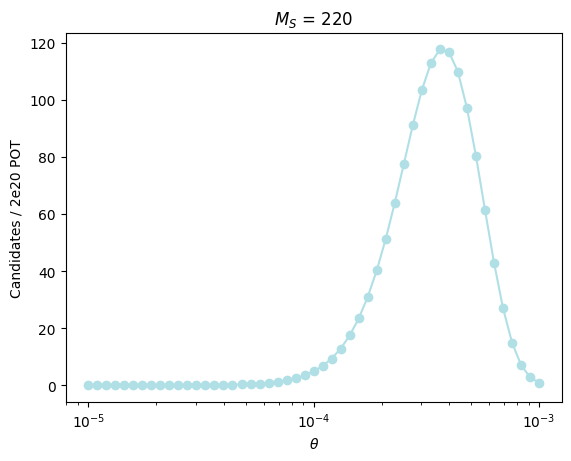

Working on '$M_S$ = 240, $\\theta_S$ = 5e-05'


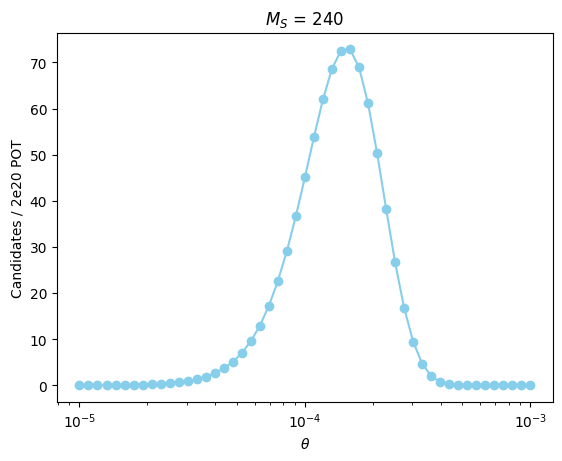

Working on '$M_S$ = 260, $\\theta_S$ = 5e-05'


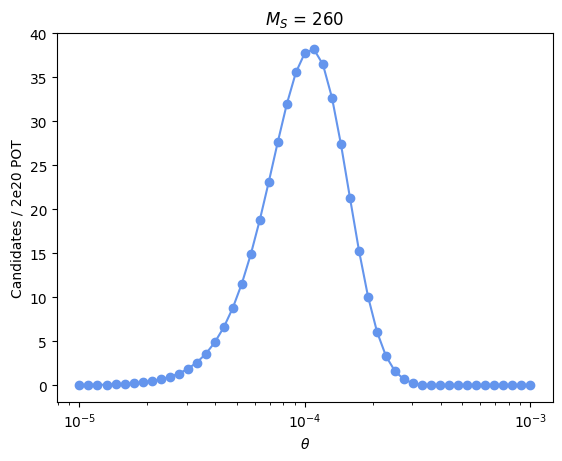

Working on '$M_S$ = 300, $\\theta_S$ = 3e-05'


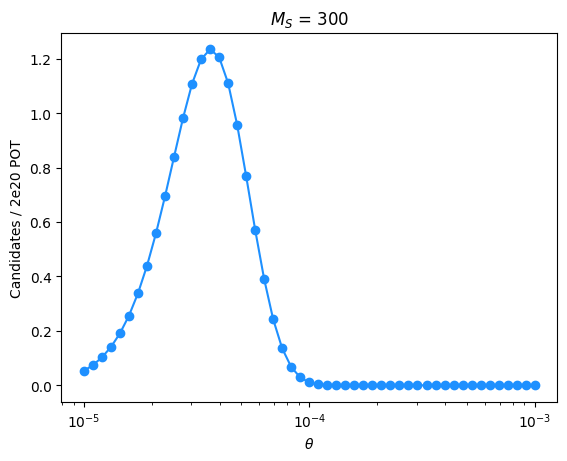

Working on '$M_S$ = 330, $\\theta_S$ = 2e-05'


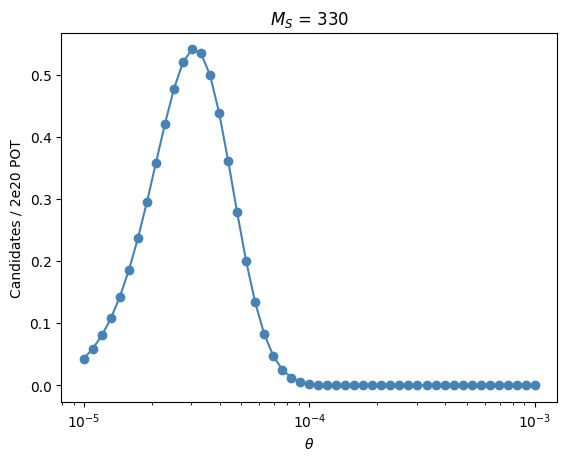

In [11]:
higgs_files = [
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/higgs_M220_DMCP2023G_evt_new.df",
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/higgs_M240_DMCP2023G_evt_new.df",
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/higgs_M260_DMCP2023G_evt_new.df",
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/higgs_M300_DMCP2023G_evt_new.df",
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/higgs_M330_DMCP2023G_evt_new.df",
]
higgs_mcdfs = [pd.read_hdf(f, key="mch") for f in higgs_files]
higgs_masses = [int(round(df.iloc[(0)].M*1000.)) for df in higgs_mcdfs]
higgs_thetas = [float(df.iloc[(0)].C1) for df in higgs_mcdfs]
low_lim = []
low_lim_count = [] 
hi_lim = []
hi_lim_count = []
test_thetas = np.logspace(-5,-3,51)
higgs_new_ns = [] # one thing per sample, each thing has same length as test_thetas.
for i in range(5):
    new_n = []
    df = evtdf[categories[i]]
    name = categories[i].name
    print('Working on %a' % name)
    old_th = higgs_thetas[i]
    for new_mixing in test_thetas:
        rescale_new_mixing = []
        for idx in df.index:
            row = higgs_mcdfs[i].loc[(idx[1],idx[2], 0)]
            factor = float(reweight_mixing(new_mixing, row.start, row.enter, row.exit, row.decay_length, old_th))
            #print(factor)
            rescale_new_mixing.append(factor)
        #print(np.array(df.scale).shape, ', ', np.array(rescale_new_mixing).shape)
        x = sum(np.array(df.scale)*np.array(rescale_new_mixing))
        #print(x)
        new_n.append(x)
    higgs_new_ns.append(np.array(new_n))
    
    #plt.plot(test_thetas, np.array(new_n), '-o', label=name.split(',')[0], color=blues[i])
    #plt.xscale('log')
    #plt.title(name.split(',')[0])
    #plt.ylabel("Candidates / %s" % POTSTR)
    #plt.xlabel("$\\theta$")
    #plt.show()

#plt.xscale('log')
#plt.title('Higgs Portal Scalars that pass selection')
#plt.ylabel("Candidates / %s" % POTSTR)
#plt.xlabel("$\\theta$")
#plt.legend()
#plt.show()
        

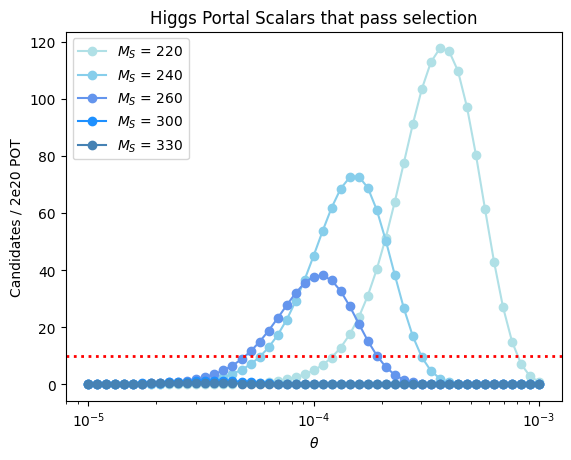

In [16]:
# Overlay all benchmark masses on same plot:

for i in range(5):
    plt.plot(test_thetas, higgs_new_ns[i], '-o', label=categories[i].name.split(',')[0], color=blues[i])
plt.xscale('log')
plt.title('Higgs Portal Scalars that pass selection')
plt.ylabel("Candidates / %s" % POTSTR)
plt.xlabel("$\\theta$")
plt.axhline([10], linestyle=":", color="r", linewidth=2)
plt.legend()
plt.savefig(dir + "higgs_theta_sensitivity.pdf")
plt.show()

In [12]:
# Skip this cell for now - come back to it when I want to make a real contour plot.
low_lim = []
low_lim_count = [] 
hi_lim = []
hi_lim_count = []
goal = 10
for i in range(5):
    print(i)
    new_n = np.array(new_ns[i])
    n_prev_from_goal = -10.
    found_low_lim = False
    for j in range(len(new_n)):
        n_current_from_goal = new_n[j]-goal
        if np.sign(n_prev_from_goal) != np.sign(n_current_from_goal): # then you just hit your goal
            #print('yip! ', categories[i].name, n_prev_from_goal, n_current_from_goal, sep=', ')
            if found_low_lim == False:
                if np.abs(n_prev_from_goal) < np.abs(n_current_from_goal):
                    low_lim_count.append(new_n[j-1])
                    low_lim.append(test_thetas[j-1])
                else:
                    low_lim_count.append(new_n[j])
                    low_lim.append(test_thetas[j])
                found_low_lim = True
            else:
                if np.abs(n_prev_from_goal) < np.abs(n_current_from_goal):
                    hi_lim_count.append(new_n[j-1])
                    hi_lim.append(test_thetas[j-1])
                else:
                    hi_lim_count.append(new_n[j])
                    hi_lim.append(test_thetas[j])
        n_prev_from_goal = n_current_from_goal
    if new_n[new_n >= goal].shape[0] == 0:
        low_lim_count.append(-1)
        low_lim.append(-1)
        hi_lim_count.append(-1)
        hi_lim.append(-1)
        

0


NameError: name 'new_ns' is not defined

# ALPs

In [11]:
mylist = [[1,1],[2,2],[3,3]]
mydf = pd.DataFrame(mylist)
mydf.to_pickle('/icarus/data/users/jdyer/muon_selection/dfs/all_nus_bg/with_kin/mylist')
mydf

,0,1
0,1,1
1,2,2
2,3,3


In [5]:
alp_nosup_files = [
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/axion-no-suppression/alp_M300_DMC2023G_evt.df",
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/axion-no-suppression/alp_M350_DMC2023G_evt.df",
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/axion-no-suppression/alp_M400_DMC2023G_evt.df",
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/axion-no-suppression/alp_M450_DMC2023G_evt.df",
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/axion-no-suppression/alp_M500_DMC2023G_evt.df",
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/axion-no-suppression/alp_M600_DMC2023G_evt.df",
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/axion-no-suppression/alp_M650_DMC2023G_evt.df"
]
alp_nosup_mcdfs = [pd.read_hdf(f, key="mch") for f in alp_nosup_files]
alp_nosup_masses = [int(round(df.iloc[(0)].M*1000.)) for df in alp_nosup_mcdfs]
alp_nosup_inv_fa = [1./float(df.iloc[(0)].C1) for df in alp_nosup_mcdfs] #play with this one!
alp_nosup_cl = [float(df.iloc[(0)].C2) for df in alp_nosup_mcdfs]

In [34]:
for c in alp_nosup_mcdfs[0].columns:
    print(c)
float(alp_nosup_mcdfs[0].iloc[0].C2)

('E', '')
('M', '')
('start', 'x')
('start', 'y')
('start', 'z')
('enter', 'x')
('enter', 'y')
('enter', 'z')
('exit', 'x')
('exit', 'y')
('exit', 'z')
('decay_length', '')
('allowed_decay_fraction', '')
('C1', '')
('C2', '')
('C3', '')
('C4', '')
('C5', '')


0.01

Working on '$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = 100000.0'


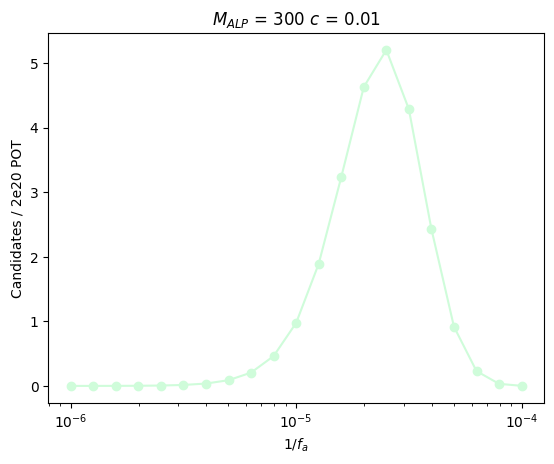

Working on '$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = 100000.0'


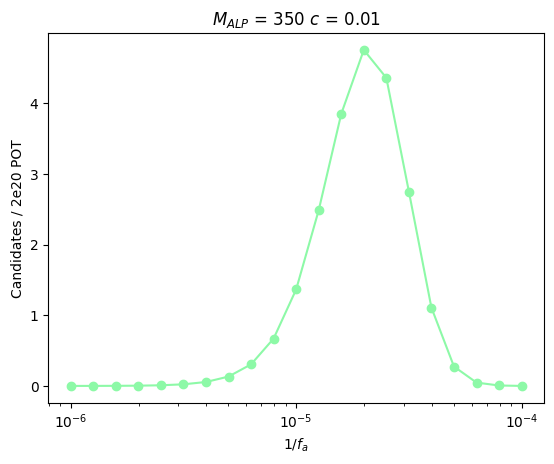

Working on '$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = 100000.0'


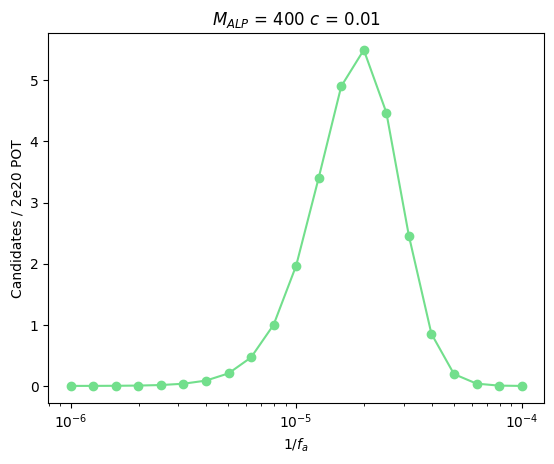

Working on '$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = 100000.0'


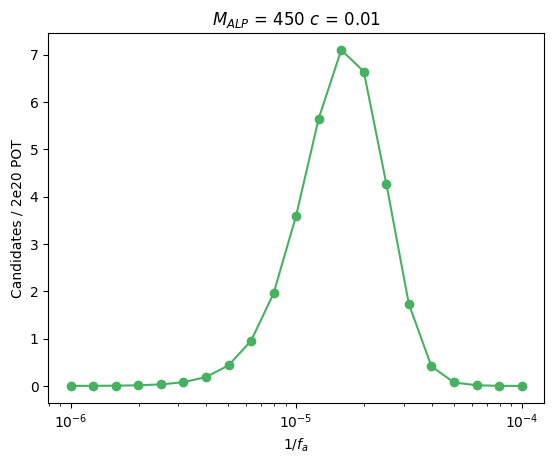

Working on '$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = 100000.0'


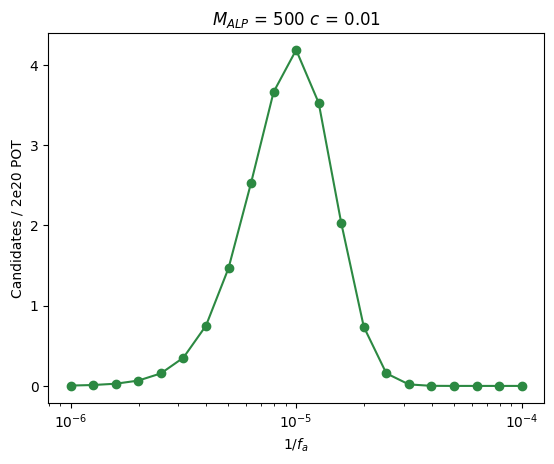

Working on '$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = 1000000.0'


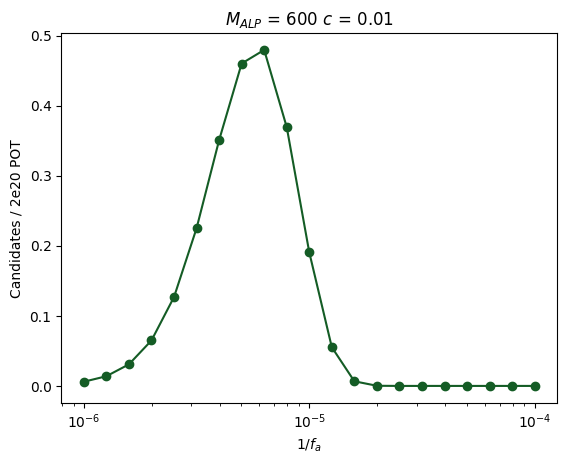

Working on '$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = 1000000.0'


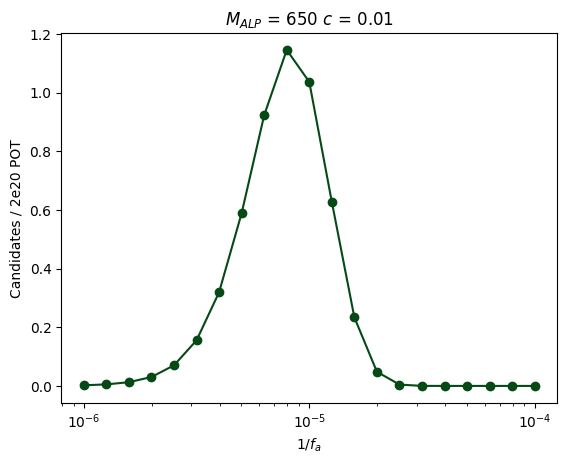

CPU times: user 19min 24s, sys: 12.6 s, total: 19min 37s
Wall time: 19min 21s


In [22]:
%%time

# Check sensitivity wrt f_a. (As is, all the benchmark models have cl=1/100.)

low_lim = []
low_lim_count = [] 
hi_lim = []
hi_lim_count = []

test_inv_fas = np.logspace(-6,-4,21)
alp_new_ns = [] # one thing per sample, each thing has same length as test_thetas.
for i in range(len(alp_nosup_files)):
    new_n = []
    df = evtdf[categories[5+i]]
    name = categories[5+i].name
    print('Working on %a' % name)
    old_inv_fa = alp_nosup_inv_fa[i]
    for new_mixing in test_inv_fas:
        rescale_new_mixing = []
        for idx in df.index:
            row = alp_nosup_mcdfs[i].loc[(idx[1],idx[2], 0)]
            factor = float(reweight_mixing(new_mixing, row.start, row.enter, row.exit, row.decay_length, oldmixing=old_inv_fa))
            #print(factor)
            rescale_new_mixing.append(factor)
        #print(np.array(df.scale).shape, ', ', np.array(rescale_new_mixing).shape)
        x = sum(np.array(df.scale)*np.array(rescale_new_mixing))
        #print(x)
        new_n.append(x)
    alp_new_ns.append(np.array(new_n))
    
    plt.plot(test_inv_fas, np.array(new_n), '-o', label=name.split(',')[0], color=greens[i])
    plt.xscale('log')
    plt.title(name.split(',')[0] + name.split(',')[1])
    plt.ylabel("Candidates / %s" % POTSTR)
    plt.xlabel("$1/f_a$")
    plt.show()
    
alp_new_ns_df = pd.DataFrame(alp_new_ns)
alp_new_ns_df.to_pickle('/icarus/data/users/jdyer/muon_selection/dfs/all_nus_bg/alp_new_ns_df_clDenom100')

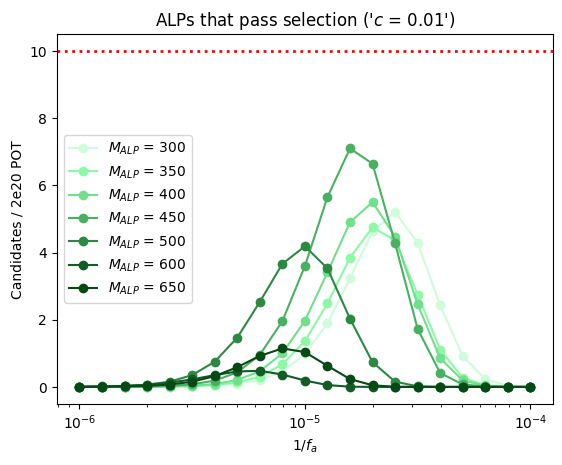

<Figure size 640x480 with 0 Axes>

In [23]:
# Overlay all benchmark masses on same plot:

for i in range(len(alp_new_ns)):
    plt.plot(test_inv_fas, alp_new_ns[i], '-o', label=categories[5+i].name.split(',')[0], color=greens[i])
plt.xscale('log')
plt.title('ALPs that pass selection (%a)' % categories[5+i].name.split(', ')[1])
plt.ylabel("Candidates / %s" % POTSTR)
plt.xlabel("$1/f_a$")
plt.axhline([10], linestyle=":", color="r", linewidth=2)
plt.legend()
plt.show()
plt.savefig(dir + "ALP_fa_sensitivity_clDenom100.pdf")

In [8]:
def decay_in_icarus(in_dist, out_dist, mean_dist):
    return (np.exp(-in_dist / mean_dist) - np.exp(-out_dist / mean_dist) ) 

def reweight_cl(newcl, start, enter, exit, mean_dist, oldcl, f):
    dist_in = dist(enter, start)
    dist_out = dist(exit, start)
    new_f = (newcl**2/oldcl**2)*f/( (newcl**2/oldcl**2)*f + 1 -f )
    
    old_lep_dcy = decay_in_icarus(dist_in, dist_out, mean_dist)*f
    #new_lep_dcy = decay_weight(dist_in, dist_out, mean_dist*f / (newcl**2 / oldcl**2))
    new_lep_dcy = decay_in_icarus( dist_in, dist_out, mean_dist/( (1-f) + f*(newcl**2 / oldcl**2) ) )*new_f
    
    return new_lep_dcy/old_lep_dcy
    

Working on '$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = 100000.0'; new cl = 0.027777777777777776


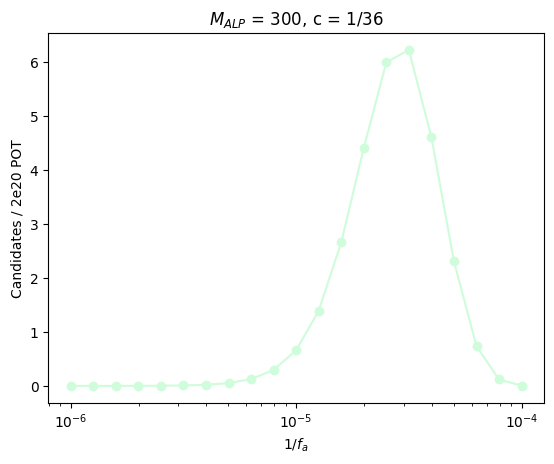

Working on '$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = 100000.0'; new cl = 0.027777777777777776


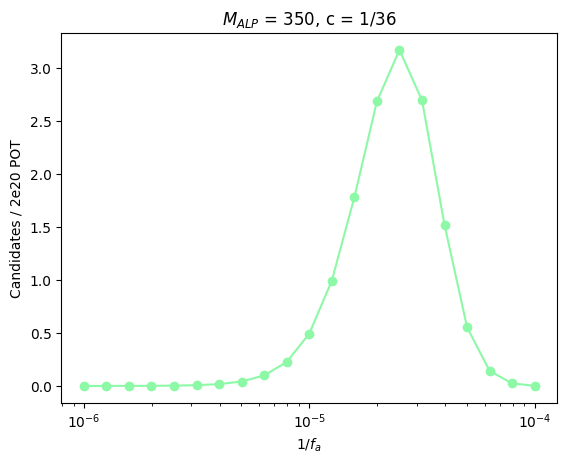

Working on '$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = 100000.0'; new cl = 0.027777777777777776


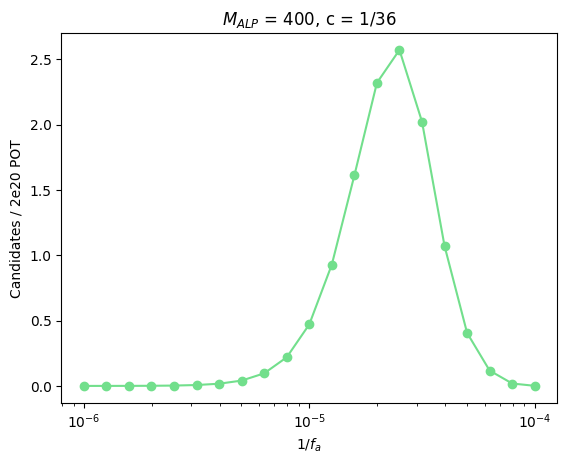

Working on '$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = 100000.0'; new cl = 0.027777777777777776


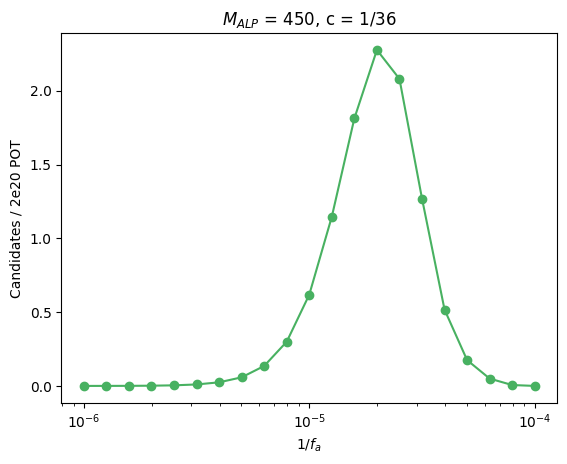

Working on '$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = 100000.0'; new cl = 0.027777777777777776


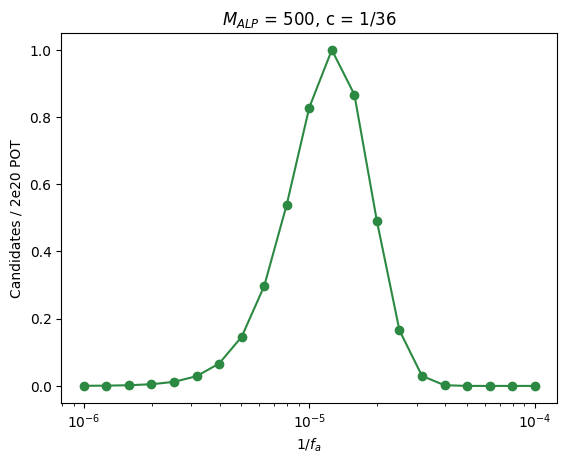

Working on '$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = 1000000.0'; new cl = 0.027777777777777776


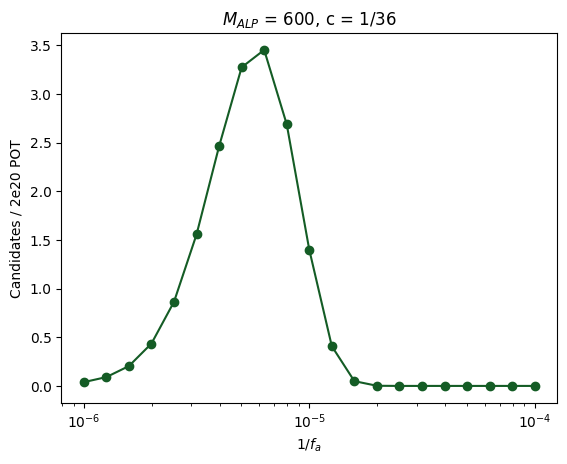

Working on '$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = 1000000.0'; new cl = 0.027777777777777776


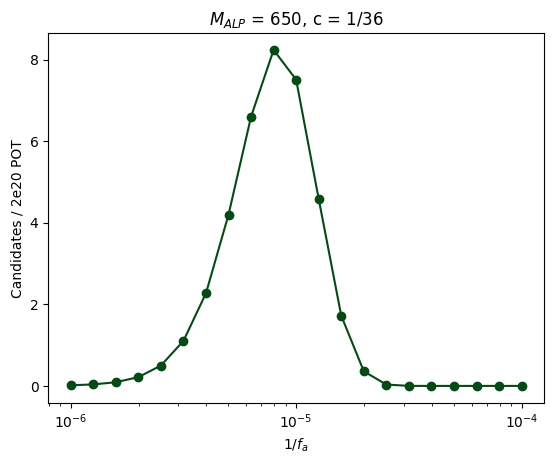

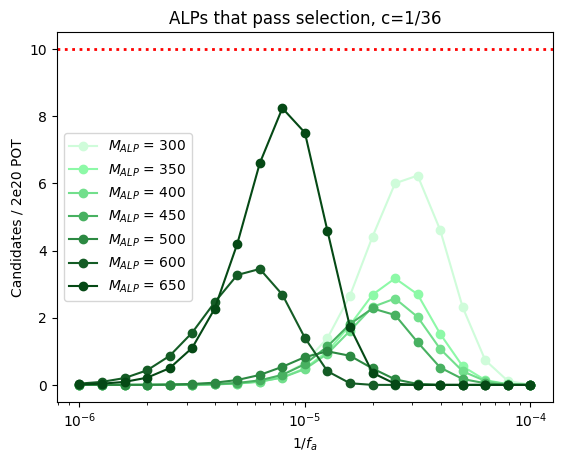

Working on '$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = 100000.0'; new cl = 0.01


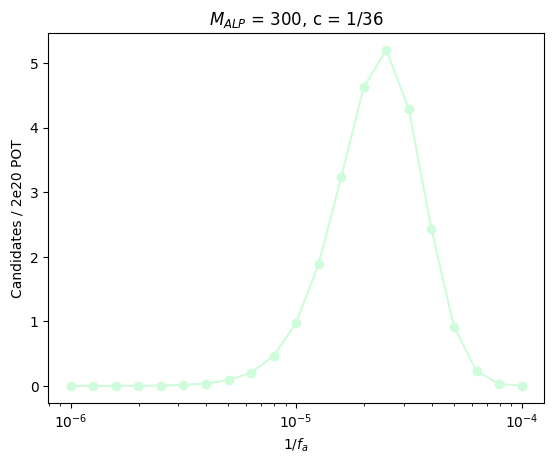

Working on '$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = 100000.0'; new cl = 0.01


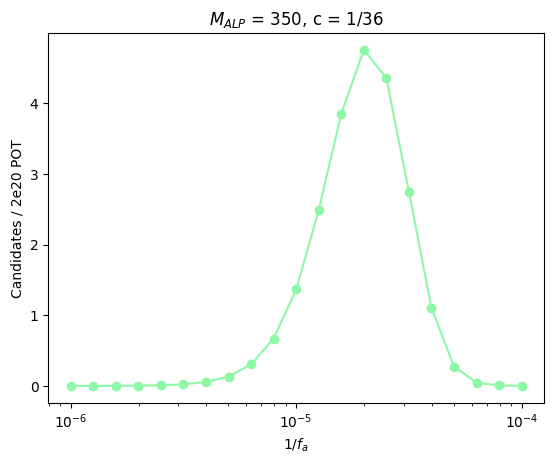

Working on '$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = 100000.0'; new cl = 0.01


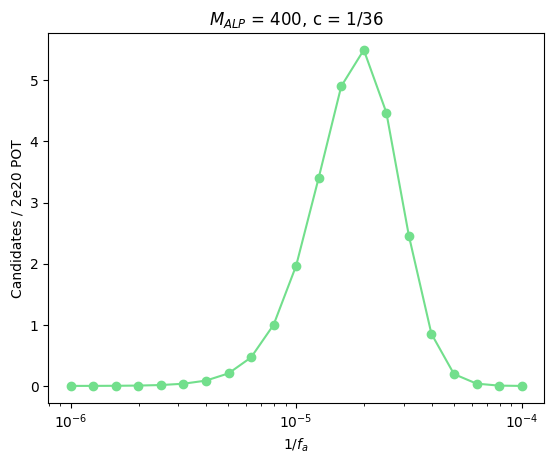

Working on '$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = 100000.0'; new cl = 0.01


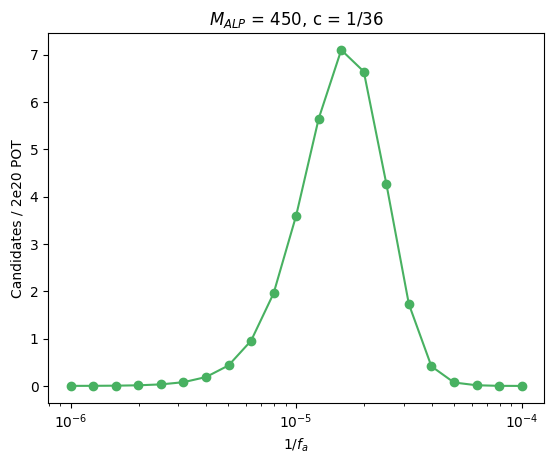

Working on '$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = 100000.0'; new cl = 0.01


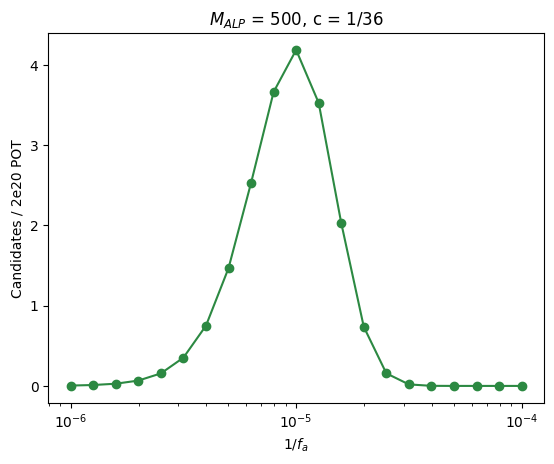

Working on '$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = 1000000.0'; new cl = 0.01


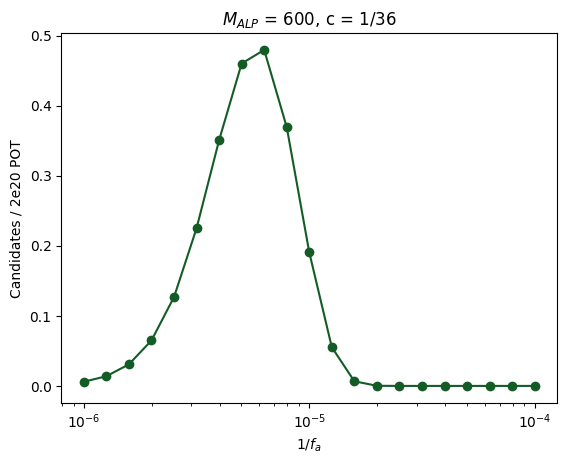

Working on '$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = 1000000.0'; new cl = 0.01


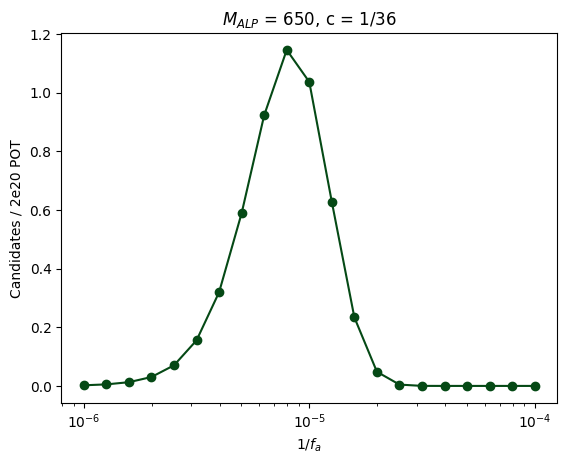

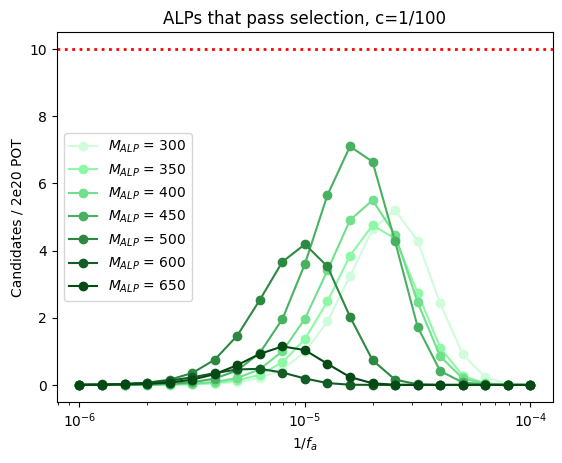

Working on '$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = 100000.0'; new cl = 0.0033333333333333335


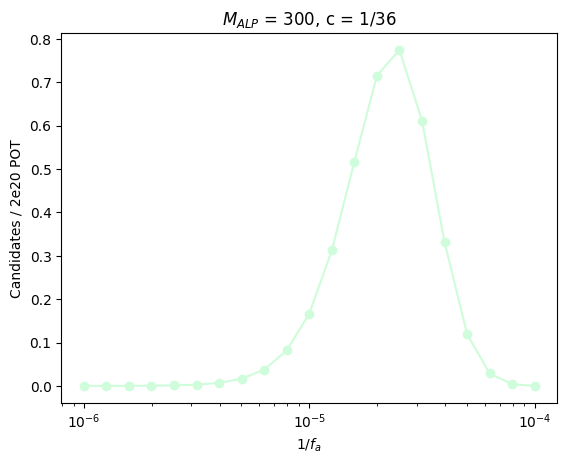

Working on '$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = 100000.0'; new cl = 0.0033333333333333335


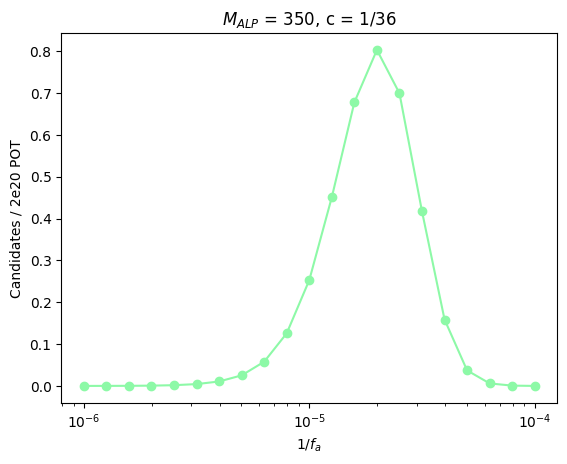

Working on '$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = 100000.0'; new cl = 0.0033333333333333335


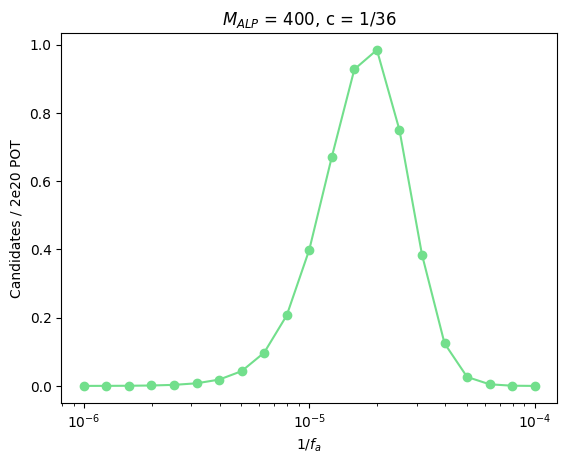

Working on '$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = 100000.0'; new cl = 0.0033333333333333335


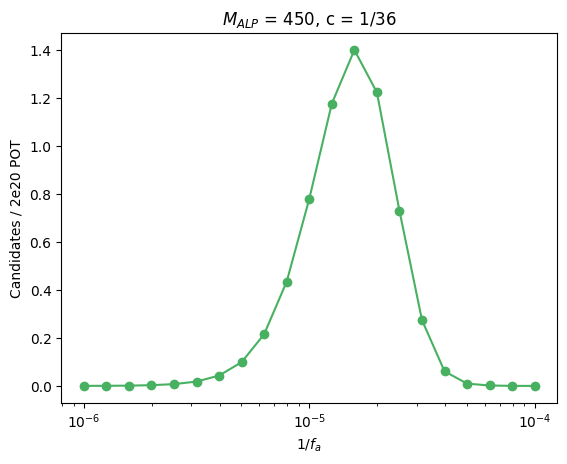

Working on '$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = 100000.0'; new cl = 0.0033333333333333335


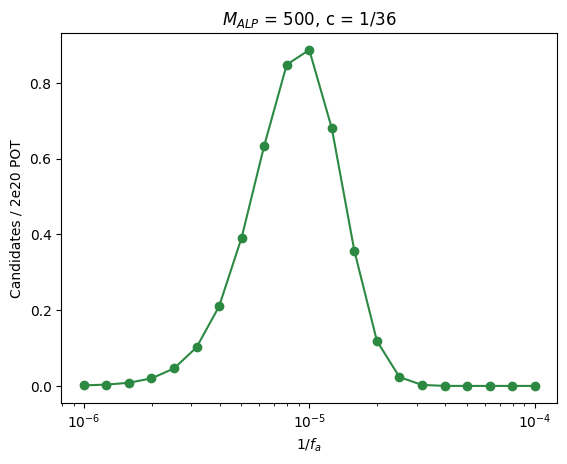

Working on '$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = 1000000.0'; new cl = 0.0033333333333333335


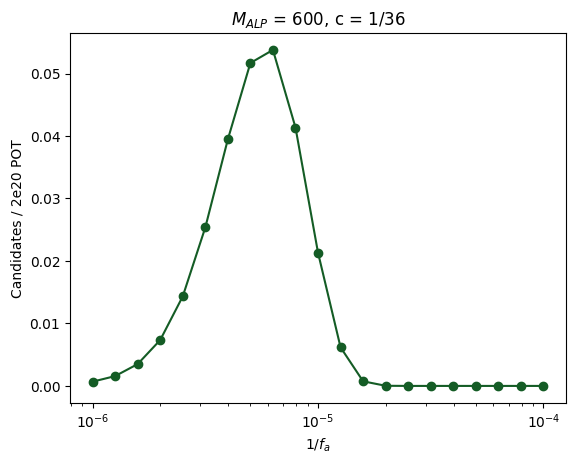

Working on '$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = 1000000.0'; new cl = 0.0033333333333333335


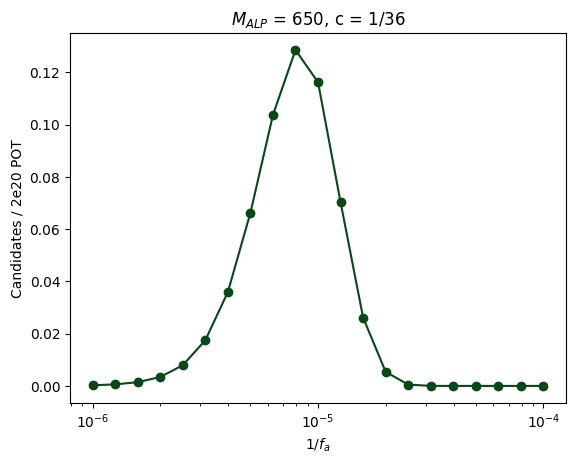

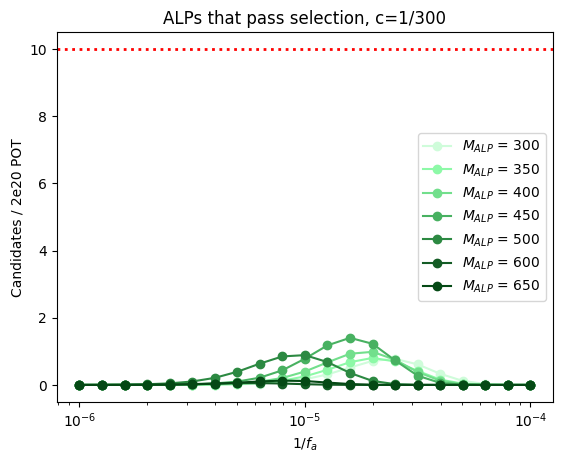

Working on '$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = 100000.0'; new cl = 0.001


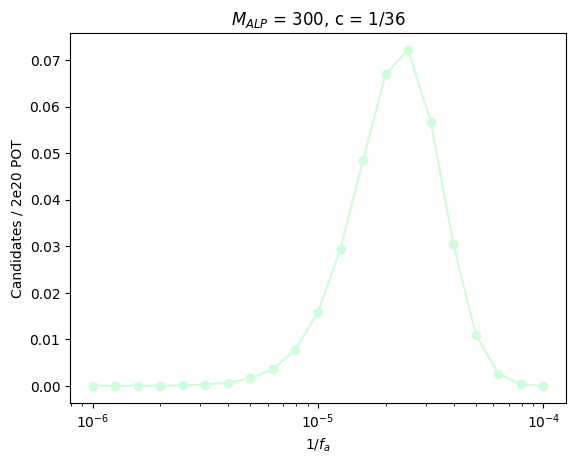

Working on '$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = 100000.0'; new cl = 0.001


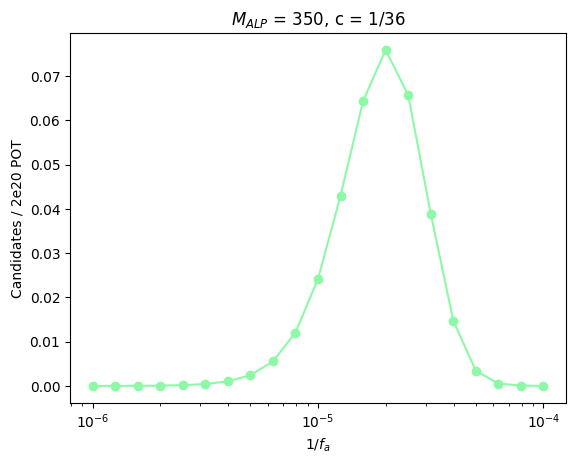

Working on '$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = 100000.0'; new cl = 0.001


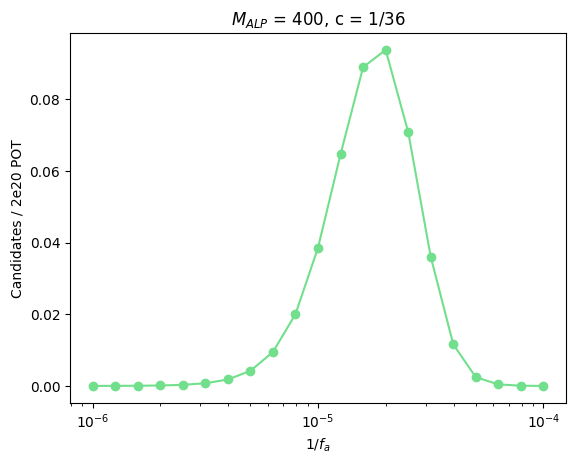

Working on '$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = 100000.0'; new cl = 0.001


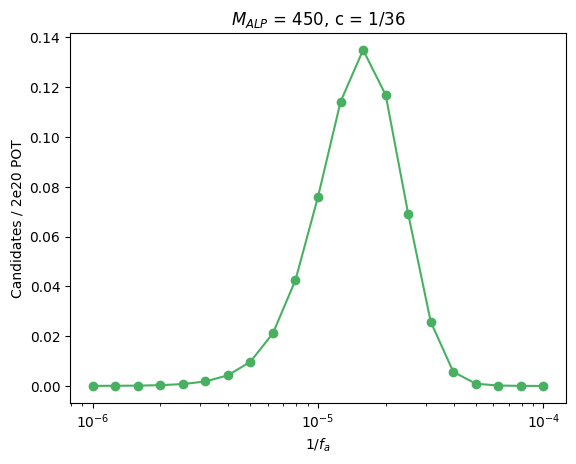

Working on '$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = 100000.0'; new cl = 0.001


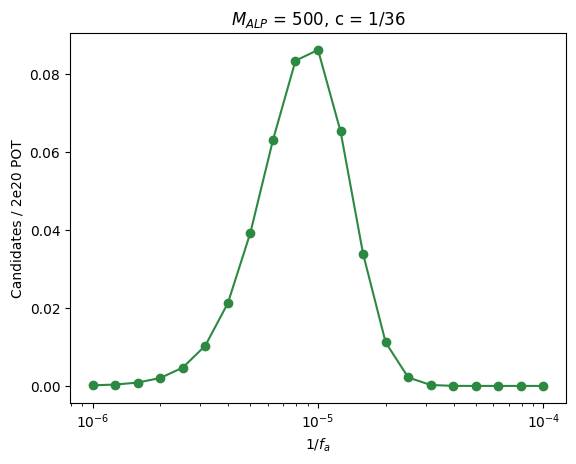

Working on '$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = 1000000.0'; new cl = 0.001


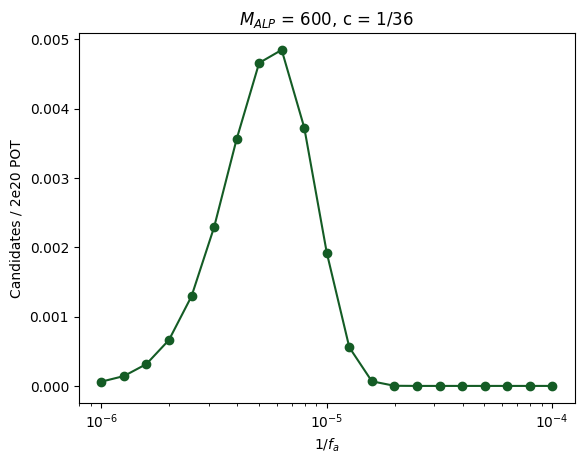

Working on '$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = 1000000.0'; new cl = 0.001


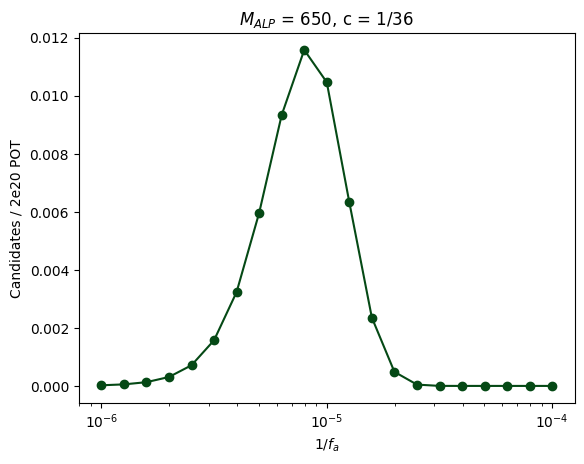

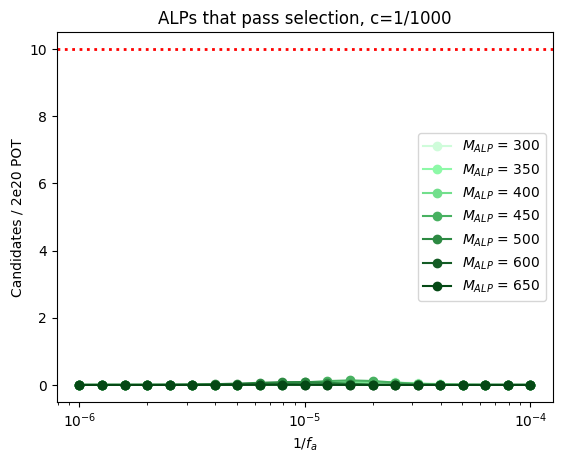

CPU times: user 2h 32min 9s, sys: 1min 6s, total: 2h 33min 15s
Wall time: 2h 31min 31s


In [10]:
%%time

# LOOP OVER CLs

test_cls = [1/36., 1/100., 1/300., 1/1000.]
clDenoms = ['36', '100', '300', '1000']
test_inv_fas = np.logspace(-6,-4,21)
for cl in range(len(test_cls)):

    new_cl = test_cls[cl]
    clDenom = clDenoms[cl]
    
    alp_new_ns = [] # one thing per sample, each thing has same length as test_inv_fas.
    for i in range(len(alp_nosup_files)):
        #if i==1: break
        new_n = []
        df = evtdf[categories[5+i]]
        name = categories[5+i].name
        print('Working on %a; new cl = ' % name + str(new_cl))
        old_inv_fa = alp_nosup_inv_fa[i]
        old_cl = alp_nosup_cl[i] #float(alp_nosup_mcdfs[i].iloc[0].C2)
        #for new_cl in test_cls: #test_inv_fas:
        #    rescale_new_cl = []
        for new_mixing in test_inv_fas:
            rescale_new_mixing = []
            rescale_new_cl = []
            for idx in df.index:
                row = alp_nosup_mcdfs[i].loc[(idx[1],idx[2], 0)]
            
                if new_mixing == old_inv_fa:
                    rescale_new_mixing.append(1.)
                else:
                    fa_factor = float(reweight_mixing(new_mixing, row.start, row.enter, row.exit, row.decay_length, oldmixing=old_inv_fa))
                    rescale_new_mixing.append(fa_factor)
            
                if new_cl == old_cl:
                    rescale_new_cl.append(1.)
                else:
                    cl_factor = float(reweight_cl(new_cl, row.start, row.enter, row.exit, row.decay_length, old_cl, row.allowed_decay_fraction))
                    rescale_new_cl.append(cl_factor)
            #print(np.array(df.scale).shape, ', ', np.array(rescale_new_mixing).shape)
            x = sum(np.array(df.scale)*np.array(rescale_new_mixing)*np.array(rescale_new_cl))
            #print(x)
            new_n.append(x)
        alp_new_ns.append(np.array(new_n))
    
        plt.plot(test_inv_fas, np.array(new_n), '-o', label=name.split(',')[0], color=greens[i])
        plt.xscale('log')
        plt.title(name.split(',')[0] + ', c = 1/' + clDenom)
        plt.ylabel("Candidates / %s" % POTSTR)
        plt.xlabel("$1/f_a$")
        plt.show()
    
    alp_new_ns_df = pd.DataFrame(alp_new_ns)
    alp_new_ns_df.to_pickle('/icarus/data/users/jdyer/muon_selection/dfs/all_nus_bg/alp_new_ns_df_clDenom'+clDenom)
    
    for i in range(len(alp_new_ns)):
        plt.plot(test_inv_fas, alp_new_ns[i], '-o', label=categories[5+i].name.split(',')[0], color=greens[i])
    plt.xscale('log')
    plt.title('ALPs that pass selection, c=1/'+clDenom)
    plt.ylabel("Candidates / %s" % POTSTR)
    plt.xlabel("$1/f_a$")
    plt.axhline([10], linestyle=":", color="r", linewidth=2)
    plt.legend()
    plt.savefig(dir + "ALP_fa_sensitivity_clDenom"+clDenom+".pdf")
    plt.show()
    

Working on '$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = 100000.0'


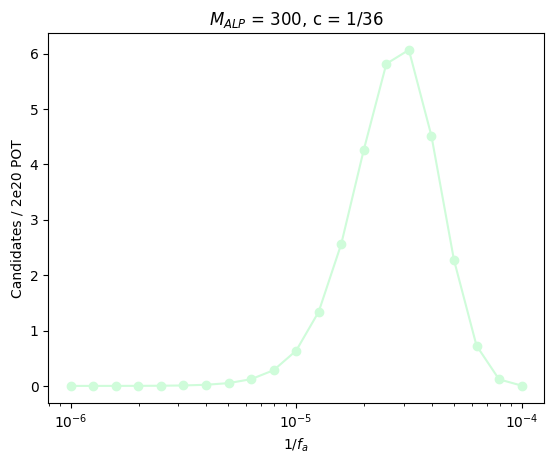

Working on '$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = 100000.0'


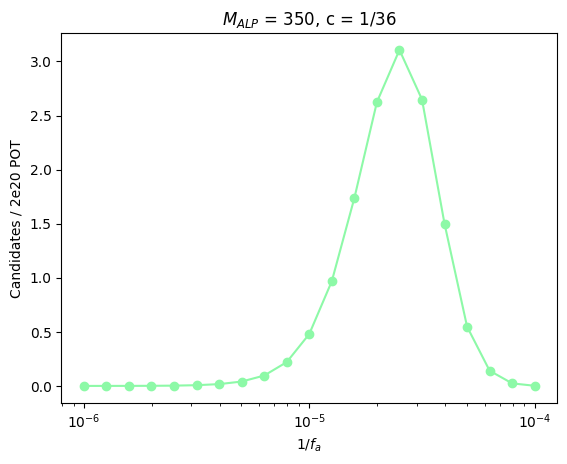

Working on '$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = 100000.0'


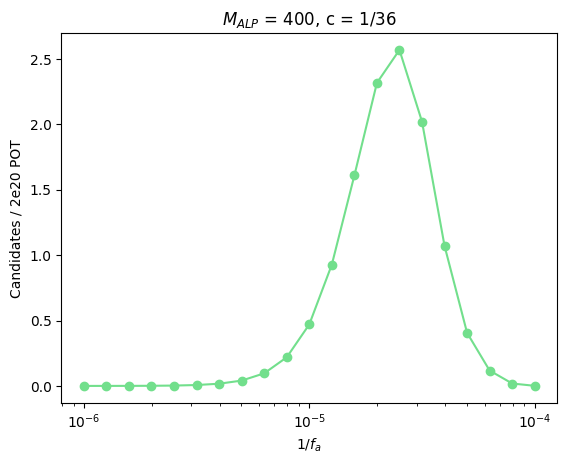

Working on '$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = 100000.0'


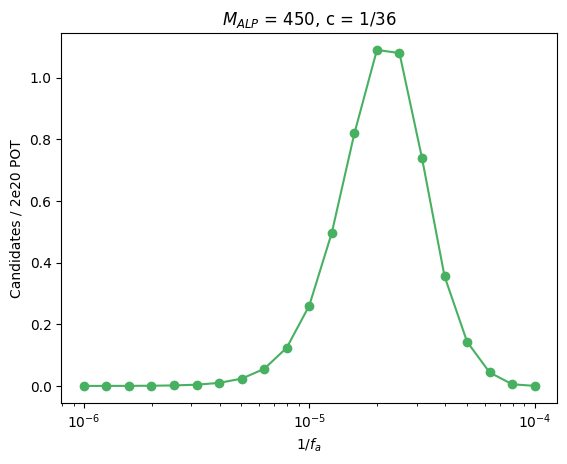

Working on '$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = 100000.0'


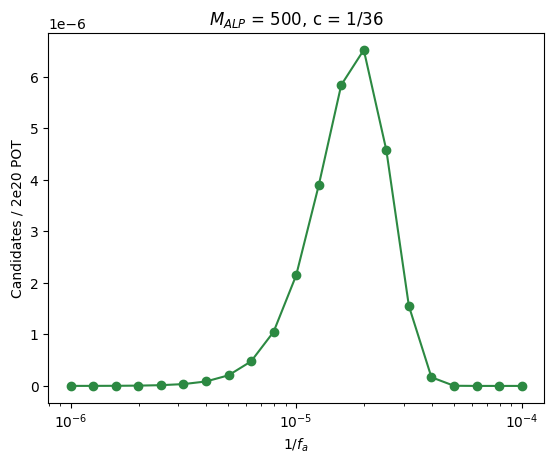

Working on '$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = 1000000.0'


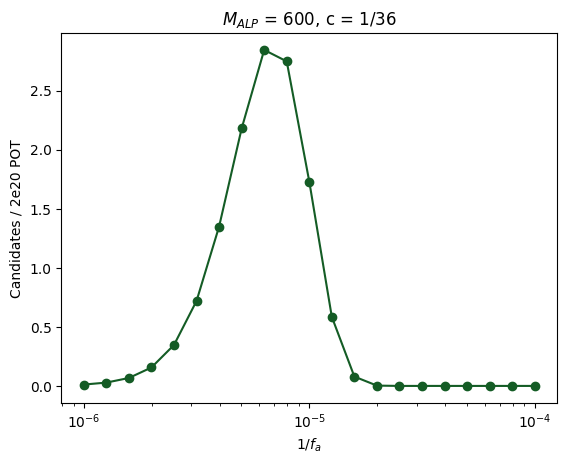

Working on '$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = 1000000.0'


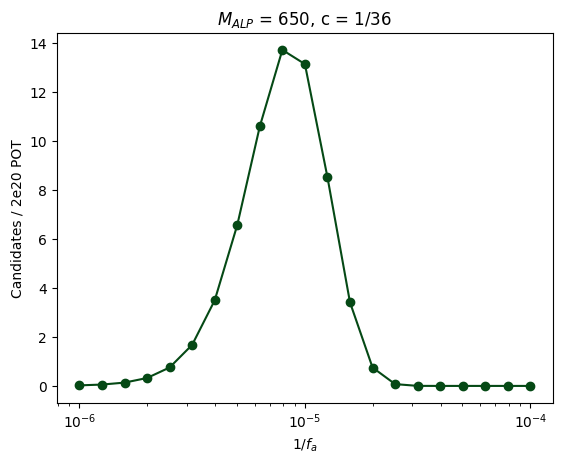

CPU times: user 37min 32s, sys: 19.5 s, total: 37min 52s
Wall time: 37min 21s


In [42]:
# One cl (=1/36.) Takes 37 minutes to run!

%%time

# Check sensitivity wrt f_a for cl=1/36

low_lim = []
low_lim_count = [] 
hi_lim = []
hi_lim_count = []


#
#test_cls = [1/36., 1/100., 1/300., 1/1000.]
new_cl = 1/36.
test_inv_fas = np.logspace(-6,-4,21)
alp_new_ns = [] # one thing per sample, each thing has same length as test_thetas.
for i in range(len(alp_nosup_files)):
    #if i==1: break
    new_n = []
    df = evtdf[categories[5+i]]
    name = categories[5+i].name
    print('Working on %a' % name)
    old_inv_fa = alp_nosup_inv_fa[i]
    old_cl = alp_nosup_cl[i] #float(alp_nosup_mcdfs[i].iloc[0].C2)
    #for new_cl in test_cls: #test_inv_fas:
    #    rescale_new_cl = []
    for new_mixing in test_inv_fas:
        rescale_new_mixing = []
        rescale_new_cl = []
        for idx in df.index:
            row = alp_nosup_mcdfs[i].loc[(idx[1],idx[2], 0)]
            
            if new_mixing == old_inv_fa:
                rescale_new_mixing.append(1.)
            else:
                fa_factor = float(reweight_mixing(new_mixing, row.start, row.enter, row.exit, row.decay_length, oldmixing=old_inv_fa))
                rescale_new_mixing.append(fa_factor)
            
            if new_cl == old_cl:
                rescale_new_cl.append(1.)
            else:
                cl_factor = float(reweight_cl(new_cl, row.start, row.enter, row.exit, row.decay_length, old_cl, row.allowed_decay_fraction))
                rescale_new_cl.append(cl_factor)
        #print(np.array(df.scale).shape, ', ', np.array(rescale_new_mixing).shape)
        x = sum(np.array(df.scale)*np.array(rescale_new_mixing)*np.array(rescale_new_cl))
        #print(x)
        new_n.append(x)
    alp_new_ns.append(np.array(new_n))
    
    plt.plot(test_inv_fas, np.array(new_n), '-o', label=name.split(',')[0], color=greens[i])
    plt.xscale('log')
    plt.title(name.split(',')[0] + ', c = 1/36')
    plt.ylabel("Candidates / %s" % POTSTR)
    plt.xlabel("$1/f_a$")
    plt.show()
    
alp_new_ns_df = pd.DataFrame(alp_new_ns)
alp_new_ns_df.to_pickle('/icarus/data/users/jdyer/muon_selection/dfs/all_nus_bg/alp_new_ns_df_clDenom36')

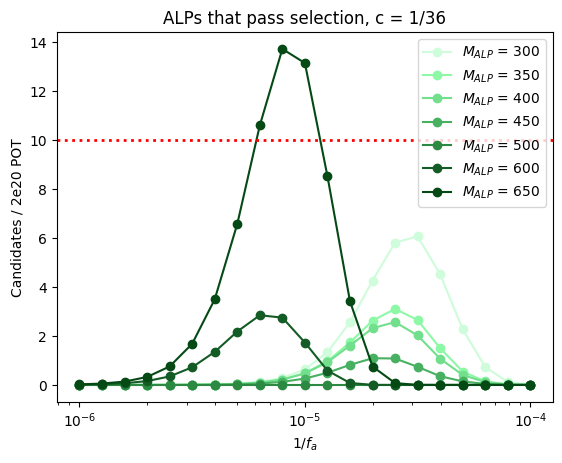

<Figure size 640x480 with 0 Axes>

In [43]:
# Overlay all benchmark masses on same plot:

for i in range(len(alp_new_ns)):
    plt.plot(test_inv_fas, alp_new_ns[i], '-o', label=categories[5+i].name.split(',')[0], color=greens[i])
plt.xscale('log')
plt.title('ALPs that pass selection, c = 1/36')
plt.ylabel("Candidates / %s" % POTSTR)
plt.xlabel("$1/f_a$")
plt.axhline([10], linestyle=":", color="r", linewidth=2)
plt.legend()
plt.show()
plt.savefig(dir + "ALP_fa_sensitivity_clDenom36.pdf")

## For now, work with just one model: mS = 220 MeV

In [4]:
f = "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/higgs_M220_DMCP2023G_evt_new.df"
mcdf = pd.read_hdf(f, key="mch")
mcdf.loc[(22,0,0)].exit
mcdf

E     M         start               \
                                                              x            y   
__ntuple entry rec.mc.prtl..index                                              
22       0     0                   0.258468  0.22  -3318.949951 -7608.777832   
         1     0                   1.259852  0.22 -30705.513672 -3499.996582   
         2     0                   1.470162  0.22 -30123.439453 -3493.172852   
         3     0                   4.290741  0.22 -31277.419922 -3309.162842   
         4     0                   1.026416  0.22 -31432.958984 -3361.683838   
...                                     ...   ...           ...          ...   
470      20    0                   0.276129  0.22  -3245.107422 -7629.313477   
         21    0                   1.840076  0.22 -31042.656250 -3358.298096   
         22    0                   0.225718  0.22 -21376.675781 -4832.483398   
         23    0                   0.862141  0.22 -30556.671875 -3483.138672   
         24    0                   1.209444  0.22 -31319.041016 -3389.484375   

                                                      enter              \
                                              z           x           y   
__ntuple entry rec.mc.prtl..index                                         
22       0     0                   -6788.357910  137.788696 -191.860001   
         1     0                  -71573.234375 -368.489990   23.958570   
         2     0                  -70117.875000 -368.489990   -6.904637   
         3     0                  -72765.851562 -368.489990  135.461472   
         4     0                  -72999.015625  -47.745369   31.198175   
...                                         ...         ...         ...   
470      20    0                   -6644.456055 -257.587891 -191.860001   
         21    0                  -72414.960938 -368.489990   89.016953   
         22    0                  -49300.347656 -143.442368 -108.865997   
         23    0                  -71095.789062 -368.489990   40.552921   
         24    0                  -72995.945312 -368.489990 -150.577789   

                                                     exit              \
                                            z           x           y   
__ntuple entry rec.mc.prtl..index                                       
22       0     0                   574.917114  292.725159  140.577881   
         1     0                  -808.147461  365.915863  109.267319   
         2     0                  -111.590813   63.573204   43.718475   
         3     0                   576.862793 -283.258850  144.960007   
         4     0                  -904.950623  368.489990   76.195076   
...                                       ...         ...         ...   
470      20    0                  -773.531677 -122.292068  144.960007   
         21    0                  -425.586212  129.290527  144.960007   
         22    0                  -904.950623  368.489990    5.020223   
         23    0                  -589.105225  271.205811  115.220909   
         24    0                   -14.287449   21.346655 -109.782249   

                                               decay_length       C1  \
                                            z                          
__ntuple entry rec.mc.prtl..index                                      
22       0     0                   904.950623  1.401306e+05  0.00005   
         1     0                   904.950623  1.281303e+06  0.00005   
         2     0                   904.950623  1.501427e+06  0.00005   
         3     0                   779.104736  4.426063e+06  0.00005   
         4     0                    51.171516  1.035543e+06  0.00005   
...                                       ...           ...      ...   
470      20    0                  -507.655121  1.723647e+05  0.00005   
         21    0                   742.657776  1.886974e+06  0.00005   
         22    0                   261.860413  5.214636

In [5]:
ms220 = make_categories(evtdf)[0]
name = ms220.name
df = evtdf[ms220]
old_th = float(name.split('=')[-1])
old_th


5e-05

In [49]:
test_thetas = np.logspace(-5,-3,51)
new_n = []
for new_mixing in test_thetas:

    rescale_new_mixing = []
    for idx in df.index:
        row = mcdf.loc[(idx[1],idx[2], 0)]
        factor = float(reweight_mixing(new_mixing, row.start, row.enter, row.exit, row.decay_length, old_th))
        #print(factor)
        rescale_new_mixing.append(factor)
    #print(np.array(df.scale).shape, ', ', np.array(rescale_new_mixing).shape)
    x = sum(np.array(df.scale)*np.array(rescale_new_mixing))
    #print(x)
    new_n.append(x)
    
new_n = np.array(new_n)


0.0005837500125751766
0.0008434606617585441
0.0012186247334669757
0.001760498850828917
0.0025430455605473124
0.00367295494562749
0.0053040623550990535
0.007658070728033926
0.011054299817223666
0.015952334625929192
0.02301306235278671
0.03318584667313438
0.047832721179194224
0.06890478538428106
0.09919181859980547
0.14267390406796285
0.20501399945666854
0.2942432191569594
0.4217061042982646
0.6033506102408289
0.8614647546042318
1.2269740420498996
1.7424116966705163
2.4656411804776246
3.4743209948917695
4.870915325708172
6.7877156436266
9.390782398520855
12.880884968757922
17.488407437395967
23.4579321059382
31.01722177231976
40.32544421278052
51.39809665188756
64.01289190685713
77.61299920903414
91.2402223602654
103.54481456548073
112.91857515777069
117.76967971457412
116.89786034613665
109.85959228111469
97.18309109101949
80.33998602563088
61.479340468541814
42.999000143045734
27.034629044987838
14.96444505344912
7.10772474070234
2.8068958040407335
0.8863095194333166


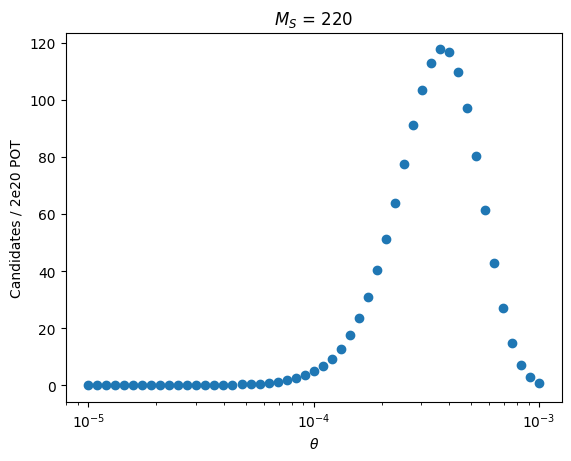

In [47]:
POTSTR = "2e20 POT"
plt.scatter(test_thetas, np.array(new_n))
plt.xscale('log')
plt.title(name.split(',')[0])
plt.ylabel("Candidates / %s" % POTSTR)
plt.xlabel("$\\theta$")
plt.show()

In [48]:
print(new_n)

[5.83750013e-04 8.43460662e-04 1.21862473e-03 1.76049885e-03
 2.54304556e-03 3.67295495e-03 5.30406236e-03 7.65807073e-03
 1.10542998e-02 1.59523346e-02 2.30130624e-02 3.31858467e-02
 4.78327212e-02 6.89047854e-02 9.91918186e-02 1.42673904e-01
 2.05013999e-01 2.94243219e-01 4.21706104e-01 6.03350610e-01
 8.61464755e-01 1.22697404e+00 1.74241170e+00 2.46564118e+00
 3.47432099e+00 4.87091533e+00 6.78771564e+00 9.39078240e+00
 1.28808850e+01 1.74884074e+01 2.34579321e+01 3.10172218e+01
 4.03254442e+01 5.13980967e+01 6.40128919e+01 7.76129992e+01
 9.12402224e+01 1.03544815e+02 1.12918575e+02 1.17769680e+02
 1.16897860e+02 1.09859592e+02 9.71830911e+01 8.03399860e+01
 6.14793405e+01 4.29990001e+01 2.70346290e+01 1.49644451e+01
 7.10772474e+00 2.80689580e+00 8.86309519e-01]


In [8]:
# def reweight_mixing(newmixing, start, enter, exit, mean_dist, oldmixing=1e-5):

print(df.shape)
print(len(rescale_new_mixing))
df['rescale_new_mixing'] = rescale_new_mixing
print(df.shape)


(37, 207)
37
(37, 208)


/tmp/ipykernel_16221/2165201844.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rescale_new_mixing'] = rescale_new_mixing


In [12]:
old_n = round(100*sum(np.array(df.scale)*np.array(df.rescale_new_mixing)))/100.
old_n = round(100*sum(df.scale*df.rescale_new_mixing))/100.
print(old_n)

    4.87
dtype: float64


In [ ]:
row_pot.append(round(100*sum(df[c].scale))/100.)